Assess impact of inhibitory connectivity on replay statistics.

In [43]:
%matplotlib inline
from copy import deepcopy as copy
import matplotlib.pyplot as plt
import numpy as np

from aux import sgmd
from disp import set_font_size, set_n_x_ticks, set_n_y_ticks
from replay import plot, smln

M_PARAMS = {
    # Exc. PC membrane
    'T_M_PC': 0.05, 'E_L_PC': -0.068, 'V_TH_PC': -0.036, 'V_R_PC': -0.068, 'T_R_PC': 0.008,
    
    # Exc. PC architecture
    'N_PC': 1000,
    'W_PC_PC': 0.03, 'L_PC_PC': 0.083, 'W_MIN_PC_PC': 0.001,
    
    # "Place-tuned" PC inputs
    'R_MAX': 20, 'L_PL': .15,
    'W_PC_PL': 0.02, 'S_PC_PL': 0,
    
    # Inh. membrane
    'T_M_INH': 0.009, 'E_L_INH': -0.058, 'V_TH_INH': -0.036, 'V_R_INH': -0.058, 'T_R_INH': 0.002,  # unused (presently)
    
    # Inh. architecture
    'N_INH': 200,
    ## PC-->INH cxns
    'W_I_PC': .018, 'L_I_PC': .08, 'W_MIN_I_PC': 0.001,
    ## INH-->PC cxns
    'W_PC_I': 0.04, 'D_PC_I': 0, 'L_PC_I': .3, 'W_MIN_PC_I': 0.001,
    
    # gating inputs
    'W_PC_G': 0.008216, 'S_PC_G': 0,
    
    # synaptic reversal potentials & time constants
    'E_E': 0, 'E_I': -0.08, 'T_E': 0.002, 'T_I': 0.005, 
    
    # Gating input firing rates for traj and replay epochs
    'R_G': 125, 
    
    # potentiation
    'SGM_MAX': 2, 'B_SGM': 1, 'R_SGM': 10
}

S_PARAMS = {
    "RNG_SEED": 0,
    "DT": 0.0005, "BOX_H": 2, "BOX_W": 2, "X_TRG": 1, "Y_TRG": -0.75,
    
    'SPD': 0.2,
    
    'TRG': [
        {'T': 0.75, 'A': 0.008, 'R': 0.3, 'D': 0.003, 'X': 0, 'Y': 0},
        {'T': 1.25, 'A': 0.008, 'R': 0.3, 'D': 0.003, 'X': -1, 'Y': 0.75},
    ],
    
    "schedule": {"D_SMLN": 1.5},
    
    "metrics": {
        "WDW": 0.1, "MIN_SCALE_TRJ": 1.25,
        "MIN_FRAC_SPK_TRJ": 0.75, "MAX_AVG_SPK_CT_TRJ": 3, "TRJ_NON_TRJ_SPK_RATIO": 1.5,
    }
}

## Connectivity profiles

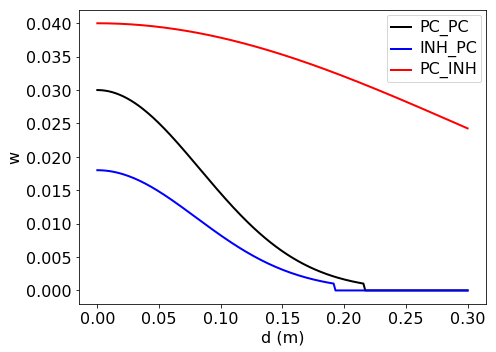

In [44]:
from replay import cxn

fig, ax = plt.subplots(1, 1, figsize=(7, 5), tight_layout=True)

d = np.linspace(0, .3, 200)

w_pc_pc = cxn._w_pc_pc_vs_d(d, M_PARAMS)
w_inh_pc = cxn._w_inh_pc_vs_d(d, M_PARAMS)
w_pc_inh = cxn._w_pc_inh_vs_d(d, M_PARAMS)

ax.plot(d, w_pc_pc, c='k', lw=2)
ax.plot(d, w_inh_pc, c='b', lw=2)
ax.plot(d, w_pc_inh, c='r', lw=2)

ax.set_xlabel('d (m)')
ax.set_ylabel('w')

ax.legend(['PC_PC', 'INH_PC', 'PC_INH'])

set_font_size(ax, 16)

# Demonstration

Running smln...
Smln complete.


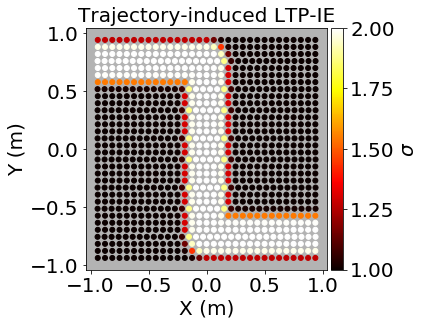

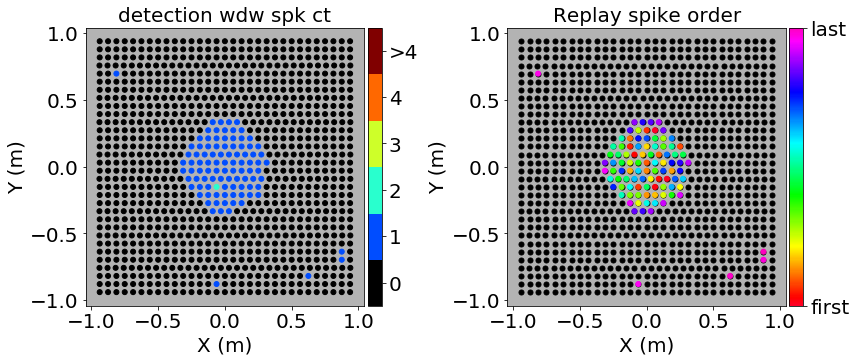

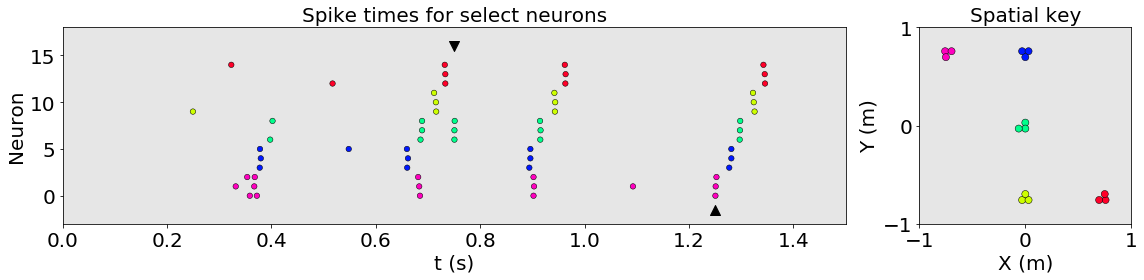

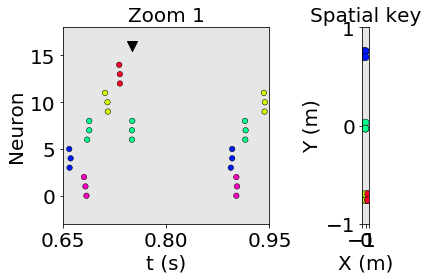

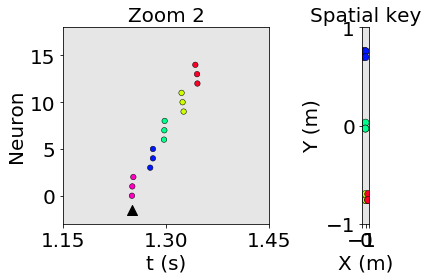

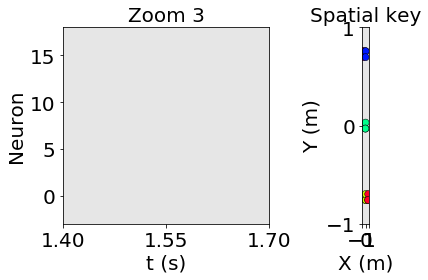

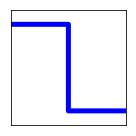

In [45]:
s_params = copy(S_PARAMS)
s_params['RNG_SEED'] = 0  # pick demo showing example spontaneous replay
s_params['TRJ'] = [(-1, .75), (0, .75), (0, -.75), (1, -.75)]

print('Running smln...')
rslt = smln.run(M_PARAMS, s_params)
print('Smln complete.')

# make plots
plot.heat_maps(rslt, cmap='gist_rainbow');

plot.raster(
    rslt,
    xys=[
    (-.75, .75), (0, .75), (0, 0), (0, -.75), (.75, -.75),  # trj
    ],
    colors=np.linspace(1, 0, 5),
    cmap='gist_rainbow',
    nearest=3,
    epoch='replay',
    trg_plt=[(16, 'v'), (-1.5, '^'), (16, 'v'), (-1.5, '^')],
    y_lim=(-3, 18),
    y_ticks=np.linspace(0, 15, 4),
    title='Spike times for select neurons',
)

for ctr, epoch in enumerate([(.65, .95), (1.15, 1.45), (1.4, 1.7)]):
    
    plot.raster(
        rslt,
        xys=[
        (-.75, .75), (0, .75), (0, 0), (0, -.75), (.75, -.75),  # trj
        ],
        colors=np.linspace(1, 0, 5),
        cmap='gist_rainbow',
        nearest=3,
        epoch=epoch,
        trg_plt=[(16, 'v'), (-1.5, '^'), (16, 'v'), (-1.5, '^')],
        y_lim=(-3, 18),
        y_ticks=np.linspace(0, 15, 4),
        fig_size=(6, 4),
        n_t_ticks=3,
        title='Zoom {}'.format(ctr + 1),
    )

# plot trj
trj = smln.build_trj(s_params)
fig, ax = plt.subplots(1, 1, figsize=(2, 2), tight_layout=True)
ax.plot(trj['x'], trj['y'], lw=5, color='b')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

ax.set_aspect('equal')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

set_font_size(ax, 20);

rslts = [rslt]